In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load in ARO data
# fromfile constructs an array from binary or text data (we have binary data in this case)
nd = np.fromfile('AST326_ARO_CasA_calibration.dat') 

# Sanity check - make sure its an array
print(type(nd))

# Size of our data set (number of elements in the array)
print("Size of Data Set: ",nd.shape)

nf = nd[0].astype(np.int64) # number of frequency channels
nt = nd[1].astype(np.int64) # number of time slices
ns = nd[2].astype(np.int64) # size of each time slice

# Sanity check!
print("Number of frequency channels:", nf)
print("Number of time slices:", nt)
print("Size of each time slice:", ns)

# The first bit of data that corresponds to the first "time slice" index 3 to ns 
# This is our list of frequencies.
nfl = nd[3:ns] # list of frequencies

tmp = nd[ns:].reshape(-1,ns)

tm = tmp[:,0] # timestamp
el = tmp[:,1] # elevation
az = tmp[:,2] # azimuth

nd = tmp[:,3:] # observational data in the order of each frequency 



<class 'numpy.ndarray'>
Size of Data Set:  (51350,)
Number of frequency channels: 1024
Number of time slices: 49
Size of each time slice: 1027


In [2]:
import astropy.time
import astropy.coordinates

# Take our timestamp values and change format to modified julien date  (generic time unit) 
T=astropy.time.Time(tm,format="mjd")

# Search up Algonquin Radio Observatory location (latitude and longitude) and altitude 
ARO_lat = astropy.coordinates.Angle(' 45.9557d') #North (d = degrees)
ARO_lon = astropy.coordinates.Angle('-78.0720d') #West (W longitudes are negative)
ARO_alt = 260.4 #meters

# Define ARO location to standard coordinate system (in reference to that of earth)
ARO_loc = astropy.coordinates.EarthLocation(lat=ARO_lat, lon=ARO_lon, height=ARO_alt)

# Search up CassA right accension and declination
CasA_ra  = astropy.coordinates.Angle('23h 23m 26s')
CasA_dec = astropy.coordinates.Angle('58° 48′') # d and m as well for deg and arcmin

# Define the sky coordinates (stores RA and DEC in degrees)
c = astropy.coordinates.SkyCoord(ra=CasA_ra,dec=CasA_dec)

# Transform the sky coordinates to altitude and azimuth values based on ARO location at the time of observations
casa_aa = c.transform_to(astropy.coordinates.AltAz(location=ARO_loc,obstime=T));

# Define casA elevation and azimuth based on the altitude and azimuth vals we just got.
casa_el = casa_aa.alt.deg
casa_az = casa_aa.az.deg

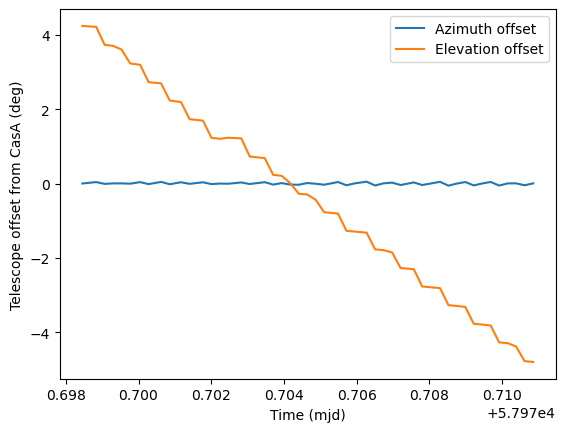

In [3]:
# Offsets of CassA in terms of ARO 
plt.plot(T.mjd,casa_az - az)
plt.plot(T.mjd,casa_el - el)
plt.legend(['Azimuth offset','Elevation offset'])
plt.xlabel('Time (mjd)')
plt.ylabel('Telescope offset from CasA (deg)');


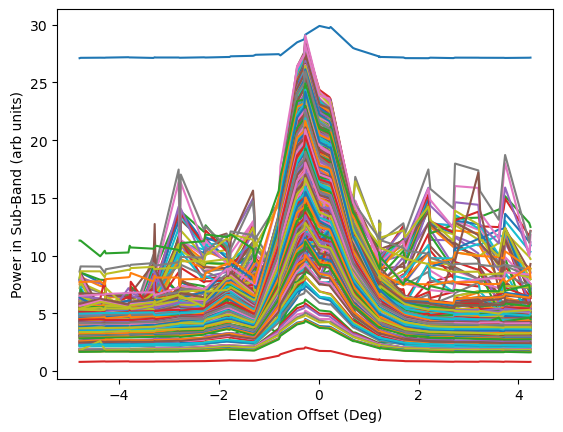

In [4]:
# Plot source intensity vs elevation offset of source and telescope
plt.plot(casa_el - el,nd)
plt.xlabel("Elevation Offset (Deg)")
plt.ylabel("Power in Sub-Band (arb units)");

In [5]:
# finding the offset

from astropy.coordinates import EarthLocation, AltAz, SkyCoord
from astropy.time import Time
import numpy as np

import astropy.time
import astropy.coordinates

# Take our timestamp values and change format to modified julien date  (generic time unit) 
T=astropy.time.Time(tm,format="mjd")

# Search up Algonquin Radio Observatory location (latitude and longitude) and altitude 
ARO_lat = astropy.coordinates.Angle(' 45.9557d') #North (d = degrees)
ARO_lon = astropy.coordinates.Angle('-78.0720d') #West (W longitudes are negative)
ARO_alt = 260.4 #meters

# Define ARO location to standard coordinate system (in reference to that of earth)
ARO_loc = astropy.coordinates.EarthLocation(lat=ARO_lat, lon=ARO_lon, height=ARO_alt)

# Search up CassA right accension and declination
CasA_ra  = astropy.coordinates.Angle('23h 23m 26s')
CasA_dec = astropy.coordinates.Angle('58° 48′') # d and m as well for deg and arcmin

# Define the sky coordinates (stores RA and DEC in degrees)
c = astropy.coordinates.SkyCoord(ra=CasA_ra,dec=CasA_dec)

# Transform the sky coordinates to altitude and azimuth values based on ARO location at the time of observations
casa_aa = c.transform_to(astropy.coordinates.AltAz(location=ARO_loc,obstime=T));

# Define casA elevation and azimuth based on the altitude and azimuth vals we just got.
casa_el = casa_aa.alt.deg
casa_az = casa_aa.az.deg

# Telescope location (Algonquin Radio Observatory)
aro_location = EarthLocation(lat=45.958, lon=-78.072, height=300)  # Height in meters

# Observation time (replace with actual time from dataset, in MJD)
observation_time = Time(57974.7, format='mjd')  # Example: MJD time

# Source equatorial coordinates (Cassiopeia A)
casa_coords = SkyCoord(ra=350.85, dec=58.815, unit='deg', frame='icrs')

# Convert to AltAz frame
altaz_frame = AltAz(obstime=observation_time, location=aro_location)
casa_altaz = casa_coords.transform_to(altaz_frame)

# Extract source elevation and azimuth
source_elevation = casa_altaz.alt.deg
source_azimuth = casa_altaz.az.deg

print(f"Source Elevation: {source_elevation:.2f} degrees")
print(f"Source Azimuth: {source_azimuth:.2f} degrees")

# Replace these arrays with actual elevation and azimuth data
elevation = casa_el  # Telescope's elevation (degrees)
azimuth = casa_az    # Telescope's azimuth (degrees)

# Replace with known source coordinates
source_elevation = 19.61  # Cassiopeia A elevation (example, replace with correct value)
source_azimuth = 339.93   # Cassiopeia A azimuth (example, replace with correct value)

# Calculate offset
pos_offsets = np.sqrt((elevation - source_elevation)**2 + (azimuth - source_azimuth)**2)
print(f"Offset: {pos_offsets}")

Source Elevation: 19.61 degrees
Source Azimuth: 339.93 degrees
Offset: [2.4488689  2.37387042 2.32840118 2.28285232 2.23737355 2.19079216
 2.13692967 2.09147569 2.0240017  1.97744169 1.91690112 1.87036893
 1.79819861 1.75277638 1.70735181 1.66194306 1.59159097 1.54617206
 1.46532314 1.41990154 1.3740494  1.32772151 1.28227311 1.23627424
 1.19074243 1.1453287  1.07084791 1.02542979 0.98002574 0.91660801
 0.87123131 0.8255067  0.77945251 0.73407218 0.66268056 0.61730373
 0.57193166 0.52153597 0.4761764  0.43084722 0.38553223 0.34023891
 0.29449962 0.24908017 0.20383771 0.15808708 0.11293828 0.0683741
 0.02599737]


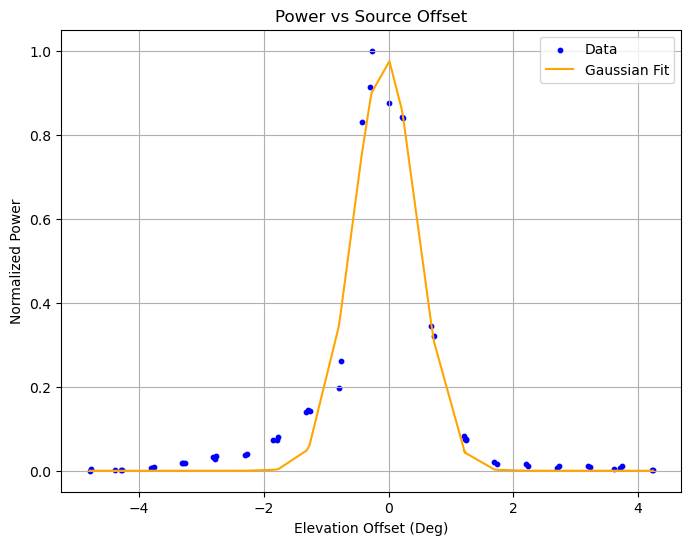

In [6]:
# import all the required libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# define the Gaussian function thats used for curve fitting
def gaussian(x, amp, mu, sigma):
    return amp * np.exp(-0.5 * ((x-mu) / sigma)** 2)

# now computing source offset
offsets = casa_el - el  
# averaging power across all frequencies for normalisation
power_sum = nd.mean(axis=1)  

# normalising power
power_sum -= np.min(power_sum)  
power_sum /= np.max(power_sum)  

# fitting thw Gaussian to data
popt, _ = curve_fit(gaussian, offsets, power_sum, p0=[1, 0, 1])
amp, mu, sigma = popt
# computing # Full-Width Half-Maximum
fwhm = 2.355*sigma  

# plotting Power vs Offset
plt.figure(figsize=(8, 6))
plt.scatter(offsets, power_sum, s=10, label="Data", color="blue")
plt.title("Power vs Source Offset")
plt.plot(offsets, gaussian(offsets, *popt), label=f"Gaussian Fit", color="orange")
plt.xlabel("Elevation Offset (Deg)")
plt.ylabel("Normalized Power")

plt.legend()
plt.grid()
plt.show()


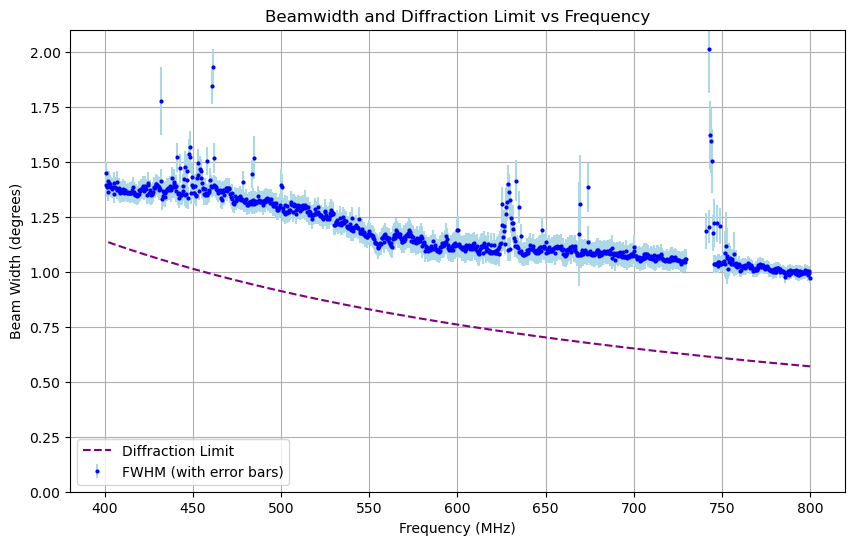

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Gaussian function for curve fitting
def gaussian(x, amp, mu, sigma):
    return amp * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Initialize variables
# nfl_mhz = nfl / 1e6
frequencies = nfl / 1e6  # List of frequencies in MHz
beamwidths = []
beamwidth_errors = []

# Iterate over frequency channels
for freq_idx in range(nd.shape[1]):  # Loop over each frequency channel
    power_profile = nd[:, freq_idx]
    offsets = casa_el - el  # Elevation offsets for the data

    # Normalize the power profile
    power_profile -= np.min(power_profile)
    power_profile /= np.max(power_profile)

    # Fit Gaussian to the power profile
    try:
        popt, pcov = curve_fit(gaussian, offsets, power_profile, p0=[1, 0, 1])
        _, _, sigma = popt
        fwhm = 2.355 * sigma  # Calculate FWHM
        beamwidths.append(fwhm)
        beamwidth_errors.append(2.355 * np.sqrt(np.diag(pcov))[2])  # Error propagation for sigma
    except RuntimeError:
        beamwidths.append(np.nan)
        beamwidth_errors.append(np.nan)

# Convert to numpy arrays for easier filtering
beamwidths = np.array(beamwidths)
beamwidth_errors = np.array(beamwidth_errors)

# Filter out noisy or invalid data points
valid_mask = (beamwidths < 2.2) & ~np.isnan(beamwidths)  # Example threshold for FWHM
filtered_frequencies = frequencies[valid_mask]
filtered_beamwidths = beamwidths[valid_mask]
filtered_errors = beamwidth_errors[valid_mask]

# Constants
speed_of_light = 3e8  # Speed of light in m/s
telescope_diameter = 46  # Telescope diameter in meters

# Calculate theoretical diffraction-limited beamwidth
diffraction_limit_deg = []
for freq_mhz in filtered_frequencies:  # Use filtered frequencies for calculations
#     freq_hz = freq_mhz * 1e6  # Convert MHz to Hz
    wavelength = speed_of_light / (freq_mhz * 1e6)
    theta_radians = 1.22 * (wavelength / telescope_diameter)  # Beamwidth in radians
    theta_degrees = np.rad2deg(theta_radians)  # Convert radians to degrees
    diffraction_limit_deg.append(theta_degrees)

# Convert to numpy array for plotting
diffraction_limit_deg = np.array(diffraction_limit_deg)

# Plot Beamwidth and Diffraction Limit vs Frequency
plt.figure(figsize=(10, 6))
plt.errorbar(filtered_frequencies, filtered_beamwidths, yerr=filtered_errors,color="blue", ecolor="lightblue", fmt=".", label="FWHM (with error bars)", markersize=4)
plt.plot(filtered_frequencies, diffraction_limit_deg, label="Diffraction Limit", color="purple", linestyle="--")
plt.xlabel("Frequency (MHz)")
plt.ylim(0,2.1)
plt.ylabel("Beam Width (degrees)")
plt.title("Beamwidth and Diffraction Limit vs Frequency")
plt.grid()
plt.legend()
plt.show()


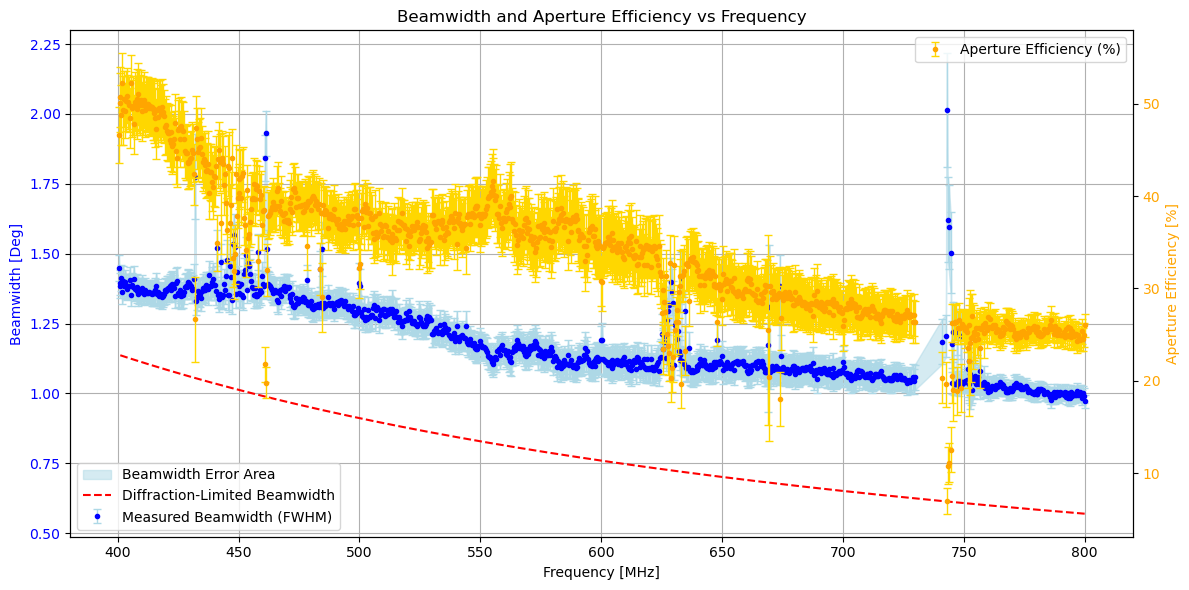

In [8]:
# import the required libraries 
import numpy as np
import matplotlib.pyplot as plt

# define the constants needed
c = 3e8  # speed of light in m/s
diam = 46  # Telescope diameter in meters
area = np.pi * (diam / 2) ** 2  # Geometric area in m^2

# creating empty lists for theoretical diffraction-limited beamwidth and aperture efficiency
diff_limit_deg = []
aper_eff = []
aper_eff_errors = []

# calculate these values with for loops 
for freq_mhz, fwhm_deg, fwhm_err_deg in zip(filtered_frequencies, filtered_beamwidths, filtered_errors):
    freq_hz = freq_mhz*1e6  
    # getting wavelenght in meters
    wavelength = c/freq_hz  

    # diffraction limit
    theta_radians = 1.22 * (wavelength/diam)  
    theta_degrees = np.rad2deg(theta_radians)  
    diff_limit_deg.append(theta_degrees)
    # aperture efficiency
    fwhm_radians = np.deg2rad(fwhm_deg)  # FWHM to radians
    fwhm_err_radians = np.deg2rad(fwhm_err_deg)  # FWHM errors to radians
    omega = 1.133 * (fwhm_radians** 2)  
    omega_err = 2*1.133 * fwhm_radians * fwhm_err_radians 
    ae = (wavelength ** 2) / (omega*area)  # aperture efficiency formula
    ae_err = ae * (omega_err / omega) 
    # to %
    aper_eff.append(ae*100) 
    aper_eff_errors.append(ae_err * 100) 

# converting the numpy arrays 
diff_limit_deg = np.array(diff_limit_deg)
aper_eff = np.array(aper_eff)
aper_eff_errors = np.array(aper_eff_errors)

# plotting Beamwidth and Aperture Efficiency vs Frequency on same axis 
fig, ax1 = plt.subplots(figsize=(12, 6))

# plotting beamwidth on the left y-axis
ax1.errorbar(filtered_frequencies, filtered_beamwidths, yerr=filtered_errors, fmt=".", color="blue", ecolor="lightblue",
             elinewidth=1, capsize=3, label="Measured Beamwidth (FWHM)")
ax1.fill_between(filtered_frequencies, filtered_beamwidths - filtered_errors, filtered_beamwidths + filtered_errors,
                 color="lightblue", alpha=0.5, label="Beamwidth Error Area")
ax1.plot(filtered_frequencies, diff_limit_deg, label="Diffraction-Limited Beamwidth", color="red", linestyle="--")
ax1.set_xlabel("Frequency [MHz]")
ax1.set_ylabel("Beamwidth [Deg]", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.legend(loc="lower left")
ax1.grid()

# plotting aperture efficiency on the right y-axis and error bars
ax2 = ax1.twinx()
ax2.errorbar(filtered_frequencies, aper_eff, yerr=aper_eff_errors, fmt=".", color="orange", ecolor="gold",
             elinewidth=1, capsize=3, label="Aperture Efficiency (%)")
ax2.set_ylabel("Aperture Efficiency [%]", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")
ax2.legend(loc="upper right")
plt.title("Beamwidth and Aperture Efficiency vs Frequency")
plt.tight_layout()
plt.show()


In [9]:
# section 4.2

# import the libraries 
import numpy as np

# define the constants 
c = 3.0e8       # speed of light
D = 46.0        # ARO dish diameter in m
k = 1.38e-23    # Boltzmann constant (J/K)
S1GHz_1977 = 2723.0  # flux density in Jy (1 Jy = 1e-26 W/m^2/Hz)
dim = 0.5 # assuming a 50% dimming since 1977
alpha = 0.7     # Spectral index

# find what the star has dimmed to now
S1GHz_current = S1GHz_1977 * dim  # Jy

# choose the representative band
freq_center = 700e6  # Hz
# find flux at the sub-band center using the standard power law S ∝ ν^(-α)
S_subband = S1GHz_current * (freq_center/1.0e9)**(-alpha)  # in Jy
# Jy to W/m^2/Hz (1 Jy = 1e-26 W/m^2/Hz)
S_subband_W = S_subband * 1e-26
print(f"Flux density near 700 MHz: {S_subband:.2f} Jy = {S_subband_W:.2e} W/m^2/Hz")

# estimating the effective aperture A_eff = η × π (D/2)^2
eta = 0.65  
A_eff = eta * np.pi * (D / 2.0)**2
print(f"Effective aperture: {A_eff:.2f} m^2")

# calculating the source temperature for a point source that (mostly) fits within the beam.
T_src = (S_subband_W * A_eff) / (2.0*k)
print(f"Estimated source temperature (Cassiopeia A) in this sub-band: {T_src:.1f} K")

Flux density near 700 MHz: 1747.63 Jy = 1.75e-23 W/m^2/Hz
Effective aperture: 1080.24 m^2
Estimated source temperature (Cassiopeia A) in this sub-band: 684.0 K


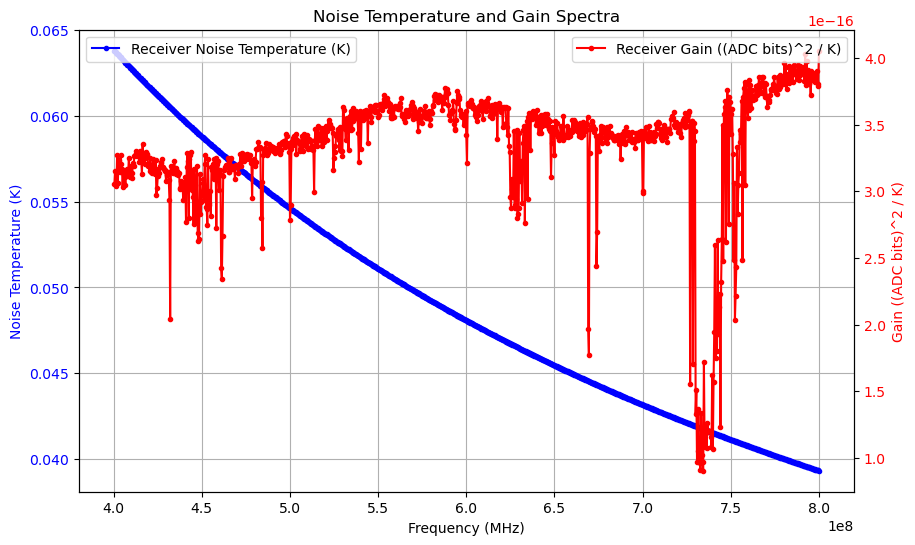

In [11]:
# import the libraries 
import numpy as np
import matplotlib.pyplot as plt

# define constants
delta_nu = 390e3  # bandwidth of each sub-band in Hz
t_sky = 10  # sky temp in Kelvin

# conversion constants
alpha = 0.7  # spectral index
jy_to_wm2hz = 1e-26
# current flux density at 1 GHz
S1GHz_current = S1GHz_1977 * dim 

t_sys = []
t_rec = []
gains = []
# looping through each frequency sub-band
for i, freq_mhz in enumerate(nfl):
    freq_hz = freq_mhz * 1e6  
    S_freq = S1GHz_current * (freq_hz / 1.0e9)**(-alpha)  # flux density at this freq
    S_freq_w = S_freq * jy_to_wm2hz  # convert to W/m^2/Hz
    # system temp
    T_src = (S_freq_w * A_eff) / (2 * k)  # source temp (K)
    T_sys_band = T_src + t_sky  # total system temp
    t_sys.append(T_sys_band)
    # gain
    mean_power = np.mean(nd[:, i])  # average power
    gain = (delta_nu * k * T_sys_band) / mean_power  
    gains.append(gain)
    # receiver temp
    T_rec_band = T_sys_band - t_sky
    t_rec.append(T_rec_band)

# Convert to numpy arrays
frequencies = np.array(nfl)  # in MHz
t_rec = np.array(t_rec)
t_sys = np.array(t_sys)
gains = np.array(gains)

fig, ax1 = plt.subplots(figsize=(10, 6))

# plotting Noise Temperature
ax1.plot(frequencies, t_rec, '.-', label="Receiver Noise Temperature (K)", color='blue')
ax1.set_xlabel("Frequency (MHz)")
ax1.set_ylabel("Noise Temperature (K)", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc="upper left")
plt.grid()
# plotting Gain
ax2 = ax1.twinx()
ax2.plot(frequencies, gains, '.-', label="Receiver Gain ((ADC bits)^2 / K)", color='red')
ax2.set_ylabel("Gain ((ADC bits)^2 / K)", color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc="upper right")
plt.title("Noise Temperature and Gain Spectra")
plt.show()


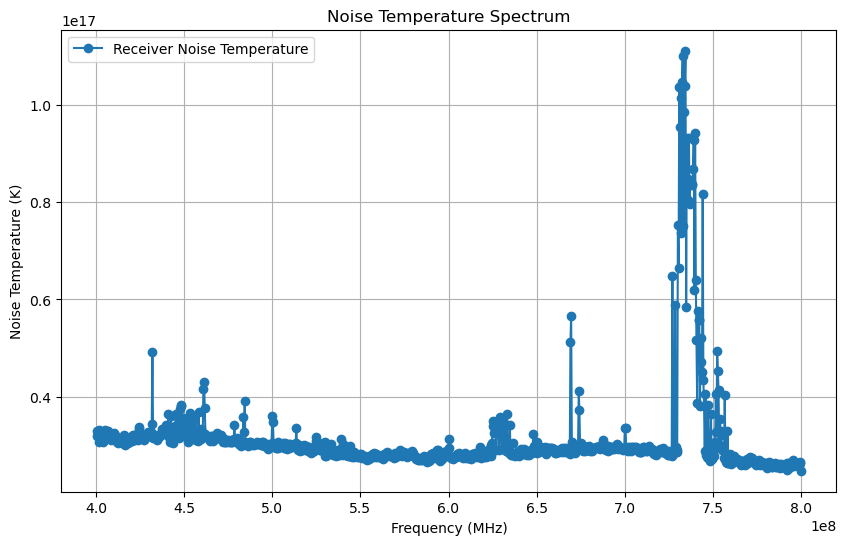

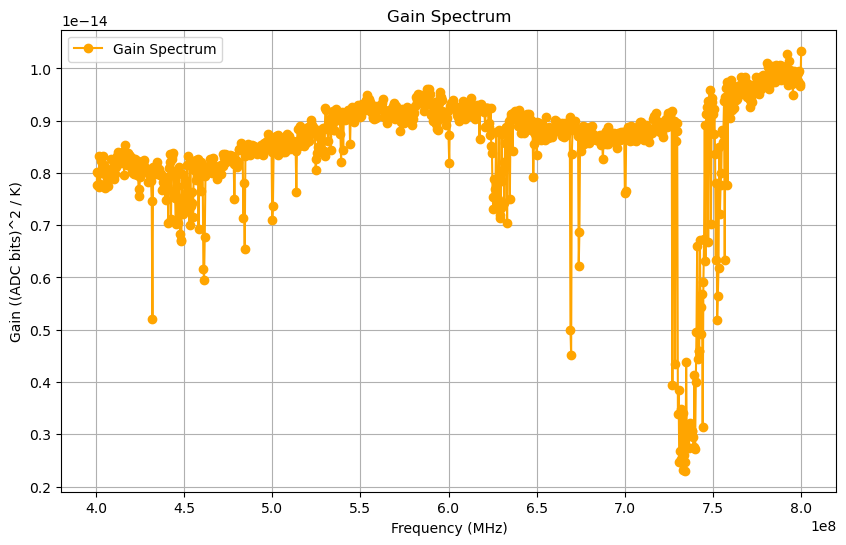

In [12]:
# Constants
k = 1.38e-23  # Boltzmann constant in J/K
adc_bits = 16  # Example ADC bits; replace with actual value
delta_nu = 390e3  # Bandwidth of each sub-band in Hz (replace with actual value)
t_sky = 10  # Assumed sky temperature in Kelvin

# Initialize arrays to store results
frequencies = nfl  # Frequencies in MHz (from data)
t_sys = []
t_rec = []
gains = []

# Loop through each frequency sub-band
for i in range(len(frequencies)):
    power = nd[:, i]  # Power for this sub-band
    mean_power = np.mean(power)  # Average power for this sub-band
    std_power = np.std(power)  # Standard deviation (for uncertainty)

    # Calculate system temperature T_sys
    t_sys_band = mean_power / (k * delta_nu)
    t_sys.append(t_sys_band)

    # Receiver temperature T_rec
    t_rec_band = t_sys_band - t_sky
    t_rec.append(t_rec_band)

    # Gain of the receiver
    gain = (adc_bits**2) / t_sys_band
    gains.append(gain)

# Convert results to numpy arrays for easier plotting
t_sys = np.array(t_sys)
t_rec = np.array(t_rec)
gains = np.array(gains)

# Plot Noise Temperature Spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, t_rec, label="Receiver Noise Temperature", marker='o')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Noise Temperature (K)")
plt.title("Noise Temperature Spectrum")
plt.grid(True)
plt.legend()
plt.show()

# Plot Gain Spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, gains, label="Gain Spectrum", marker='o', color="orange")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Gain ((ADC bits)^2 / K)")
plt.title("Gain Spectrum")
plt.grid(True)
plt.legend()
plt.show()


Flux density of Cas A (Jy) for each frequency channel:
[9.80239605e+13 9.75869879e+13 9.74647890e+13 ... 9.61707646e+13
 9.66090311e+13 9.57449631e+13]
Effective Aperture (m^2): 997.1415082494002
Apparent Temperature of Cas A (K) for each frequency channel:
[7.08288115e+13 7.05130698e+13 7.04247730e+13 ... 6.94897545e+13
 6.98064311e+13 6.91820847e+13]
Receiver Noise Temperature (K) for each frequency channel:
[1.63495663e+12 1.95069834e+12 2.03899512e+12 ... 2.97401357e+12
 2.65733697e+12 3.28168341e+12]
Receiver Gain ((ADC counts)^2/K) for each frequency channel:
[5.84348380e-13 4.85408418e-13 4.63225969e-13 ... 3.09212315e-13
 3.49222658e-13 2.77746619e-13]


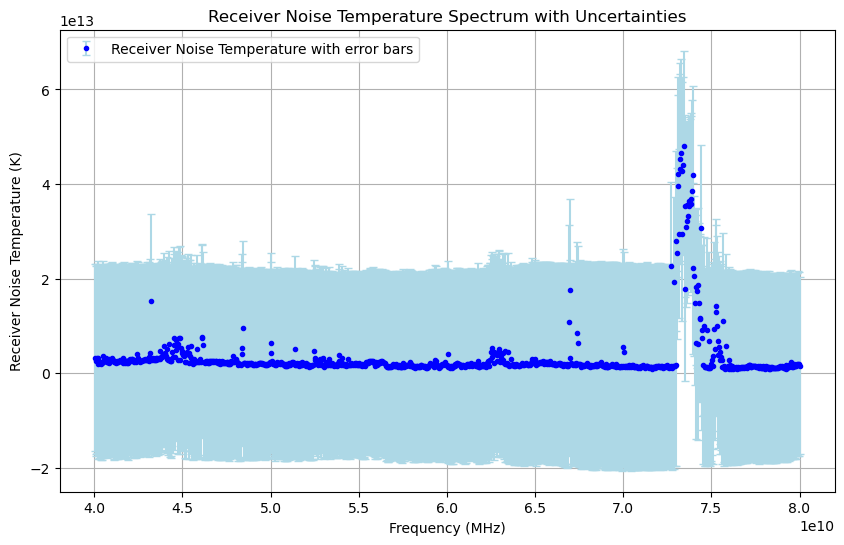

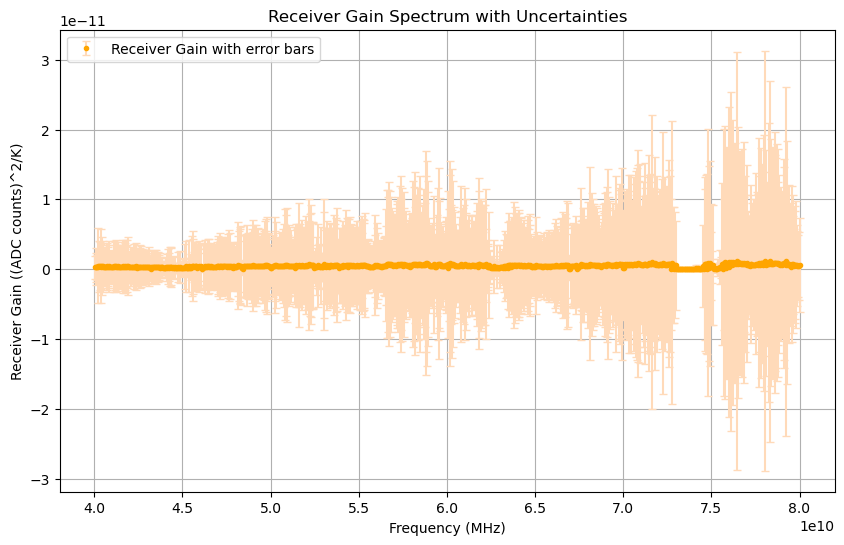

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import astropy.time
import astropy.coordinates

# ============================================================================
# Assume that your initial calibration code has already run and provided:
#   - nf, nt, ns       : header information
#   - nfl              : frequency channels (stored in MHz but need to be multiplied by 100)
#   - tm, el, az       : timestamps, elevation, azimuth
#   - nd               : observational data (2D array, shape (nt, nf)) in ADC counts
# ============================================================================

# ============================================================================
# Calibration constants and parameters
# ============================================================================
k_B = 1.38e-23            # Boltzmann constant [J/K]
eta = 0.6                 # Assumed aperture efficiency
D = 46.0                  # Telescope diameter [m]
A_geo = np.pi * (D/2)**2    # Geometric area of the dish [m^2]
A_eff = eta * A_geo       # Effective aperture [m^2]

# Calibration parameters (update these if you have actual numbers)
cal_factor = 1e-3         # Conversion from ADC counts to power (W per ADC count)
bandwidth = 1e6           # Bandwidth per sub–band [Hz]

# ============================================================================
# On–Source and Off–Source Selection
# ============================================================================
# For each frequency channel (columns in nd) we assume that the maximum ADC value
# corresponds to the on-source (Cas A) measurement.
on_source_indices = np.argmax(nd, axis=0)  # Index of max value for each channel
on_source_ADC = nd[on_source_indices, np.arange(nd.shape[1])]  # On-source ADC counts

# Estimate the off–source (baseline) ADC counts as the median over time.
off_source_ADC = np.median(nd, axis=0)

# The net signal from Cas A in ADC counts:
delta_ADC = on_source_ADC - off_source_ADC

# ============================================================================
# Convert ADC Counts to Power
# ============================================================================
# Convert the ADC count differences and baseline values to physical power (W)
P_source = delta_ADC * cal_factor        # Power from Cas A (W)
P_baseline = off_source_ADC * cal_factor   # Baseline (off–source) power (W)

# ============================================================================
# 1. Flux Calculation (if needed)
# ============================================================================
# The flux density (in W/m^2/Hz) is:
#   S_nu = P_source / (A_eff * bandwidth)
S_nu = P_source / (A_eff * bandwidth)  # in W/m^2/Hz

# Convert to Jansky (1 Jy = 1e-26 W/m^2/Hz)
flux_Jy = S_nu / 1e-26
print("Flux density of Cas A (Jy) for each frequency channel:")
print(flux_Jy)

# ============================================================================
# 2. Effective Aperture Calculation (already computed)
# ============================================================================
print("Effective Aperture (m^2):", A_eff)

# ============================================================================
# 3. Temperature of Cas A
# ============================================================================
# Using the Rayleigh–Jeans law: T = P / (k_B * bandwidth)
T_CasA = P_source / (k_B * bandwidth)
print("Apparent Temperature of Cas A (K) for each frequency channel:")
print(T_CasA)

# ============================================================================
# 4. Receiver Noise Temperature
# ============================================================================
# Estimate the system temperature from the off–source power:
T_sys = P_baseline / (k_B * bandwidth)
T_sky = 10.0   # Assumed sky temperature [K]
T_rec = T_sys - T_sky
print("Receiver Noise Temperature (K) for each frequency channel:")
print(T_rec)

# ============================================================================
# 5. Receiver Gain
# ============================================================================
# Gain is defined as: Gain = (ADC_signal^2) / T_sys, where ADC_signal is delta_ADC.
Gain = (delta_ADC**2) / T_sys
print("Receiver Gain ((ADC counts)^2/K) for each frequency channel:")
print(Gain)

# ============================================================================
# 6. Determining Uncertainties
# ============================================================================

# Compute the standard deviation of the ADC counts (over time) for each frequency channel.
# This serves as our measurement uncertainty in ADC counts.
sigma_ADC = np.std(nd, axis=0)

# ---------------------------
# Uncertainty in Noise Temperature (T_rec)
# ---------------------------
# The uncertainty in power, sigma_P, is:
sigma_P = sigma_ADC * cal_factor  # [W]

# Propagate the uncertainty into T_sys using:
#   sigma_T_sys = T_sys * sqrt((sigma_P/P_baseline)^2 + (sigma_(Delta_nu)/Delta_nu)^2)
# We assume sigma_(Delta_nu)/Delta_nu is negligible.
sigma_T_sys = T_sys * (sigma_P / P_baseline)

# Since T_rec = T_sys - T_sky and T_sky is assumed constant, its uncertainty is:
sigma_T_rec = sigma_T_sys

# ---------------------------
# Uncertainty in Gain
# ---------------------------
# Gain = (delta_ADC^2) / T_sys.
# Propagate uncertainties:
#   sigma_Gain = Gain * sqrt( (sigma_b/delta_ADC)^2 + (sigma_T_sys/T_sys)^2 )
# where sigma_b is sigma_ADC.
sigma_gain = Gain * np.sqrt((sigma_ADC / delta_ADC)**2 + (sigma_T_sys / T_sys)**2)

# ============================================================================
# 7. Plot Noise Temperature and Gain Spectra with Error Bars
# ============================================================================

# Correct the frequency values.
# Since your header frequencies are in MHz but appear scaled down by 100,
# multiply by 100 to get the proper values.
frequencies_MHz = nfl * 100

# Plot Receiver Noise Temperature with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(frequencies_MHz, T_rec, yerr=sigma_T_rec, fmt='.', color='blue', ecolor='lightblue',
             capsize=3, label='Receiver Noise Temperature with error bars')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Receiver Noise Temperature (K)")
plt.title("Receiver Noise Temperature Spectrum with Uncertainties")
plt.legend()
plt.grid(True)
plt.show()

# Plot Receiver Gain with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(frequencies_MHz, Gain, yerr=sigma_gain, fmt='.', color='orange',ecolor='peachpuff',
             capsize=3, label='Receiver Gain with error bars')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Receiver Gain ((ADC counts)^2/K)")
plt.title("Receiver Gain Spectrum with Uncertainties")
plt.legend()
plt.grid(True)
plt.show()


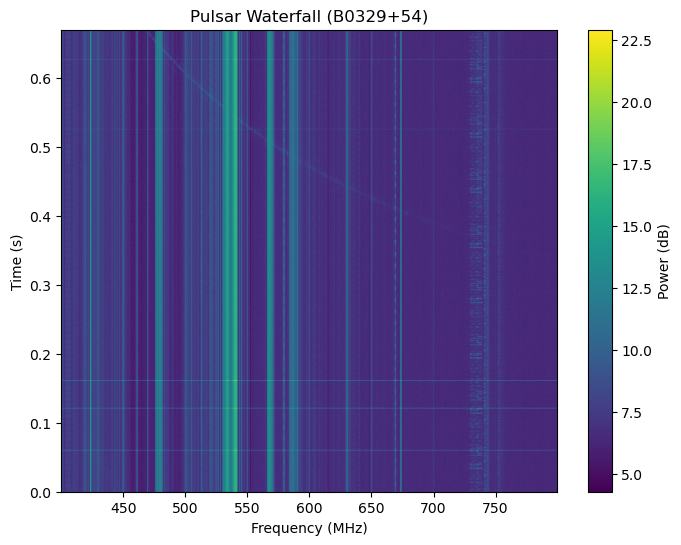

In [14]:
import struct
import numpy as np
import matplotlib.pyplot as plt

def read_pulsar_data(filename):
    """
    Reads B0329+54 pulsar data file:
      - 48-byte header
      - nf×2 frequency bins
      - time slices of size sl
    Returns
    time_sec : 1D array of times (s)
    freqs    : 1D array of frequency-bin centers (MHz)
    waterfall: 2D array of shape (ntimes, nf) containing Stokes I
    """

    with open(filename, 'rb') as f:
        # read the 48-byte header
        header_format = '=iiii d i i i I d'
        header_size = struct.calcsize(header_format)
        header_data = f.read(header_size)
        (sl, hl, ns, dt, cr, nf, ne, ss, hidx, hutc) = struct.unpack(header_format, header_data)
        # read frequency table
        freq_format = f'={nf*2}f'
        freq_size = struct.calcsize(freq_format)
        freq_data = f.read(freq_size)
        freq_array = struct.unpack(freq_format, freq_data)
        # reshape so each row is [start_freq, stop_freq]
        freq_array  = np.array(freq_array).reshape(nf, 2)
        freqs = 0.5 * (freq_array[:, 0] + freq_array[:, 1])
        # time slices
        slice_format = f'=i f f {nf}f'
        slice_size   = struct.calcsize(slice_format)
        if slice_size != sl:
            raise ValueError(f"Slice size from file ({sl}) does not match calculated struct size ({slice_size})!")
        time_indices = []
        waterfall_list = []

        for _ in range(ns):
            slice_bytes = f.read(slice_size)
            if not slice_bytes:
                break
            slice_data = struct.unpack(slice_format, slice_bytes)
            idx = slice_data[0]
            elev = slice_data[1]
            azim = slice_data[2]
            stokes = slice_data[3:]
            time_indices.append(idx)
            waterfall_list.append(stokes)
        time_indices = np.array(time_indices)
        waterfall    = np.array(waterfall_list, dtype=np.float32)

        # ---------------------
        # 4) Compute time in seconds
        # ---------------------
        time_sec = time_indices * cr * ss

        return time_sec, freqs, waterfall


if __name__ == "__main__":
    # Replace this with the actual filename:
    filename = "AST326_ARO_B0329+54.v01.dat"

    time_sec, freqs, waterfall = read_pulsar_data(filename)
    # converting intensities to dB (optional)
    waterfall_dB = 10 * np.log10(waterfall + 1e-10)

    # making a waterfall plot: time vs frequency
    plt.figure(figsize=(8, 6))
    plt.imshow(
        waterfall_dB,     
        aspect='auto',
        origin='lower',
        extent=[freqs.min(), freqs.max(), time_sec.min(), time_sec.max()],  
        cmap='viridis'
    )
    plt.colorbar(label='Power (dB)')
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Time (s)")
    plt.title("Pulsar Waterfall (B0329+54)")
    plt.show()

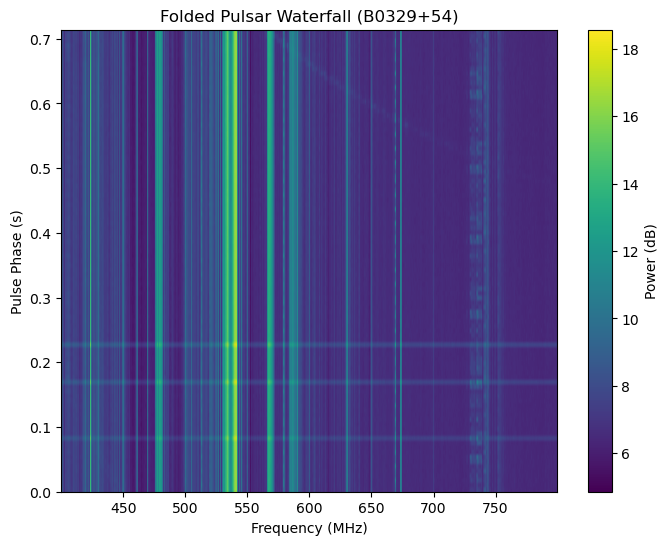

In [15]:
import struct
import numpy as np
import matplotlib.pyplot as plt

def read_pulsar_data(filename):
    """
    Reads the B0329+54 pulsar data file as described:
    - 48-byte header
    - nf×2 frequency bins
    - time slices of size sl

    Returns
    -------
    time_sec : 1D array of times (s)
    freqs    : 1D array of frequency-bin centers (MHz)
    waterfall: 2D array of shape (ntimes, nf) containing Stokes I
    """
    try:
        with open(filename, 'rb') as f:
            # ---------------------
            # 1) Read the 48-byte header
            # ---------------------
            header_format = '=iiii d i i i I d'
            header_size = struct.calcsize(header_format)

            header_data = f.read(header_size)
            if not header_data:
                raise ValueError("Failed to read header from file.")

            (sl, hl, ns, dt, cr, nf, ne, ss, hidx, hutc) = struct.unpack(header_format, header_data)

            # ---------------------
            # 2) Read the frequency table
            # ---------------------
            freq_format = f'={nf*2}f'
            freq_size = struct.calcsize(freq_format)
            freq_data = f.read(freq_size)
            if not freq_data:
                raise ValueError("Failed to read frequency data from file.")

            freq_array = struct.unpack(freq_format, freq_data)
            freq_array = np.array(freq_array).reshape(nf, 2)
            freqs = 0.5 * (freq_array[:, 0] + freq_array[:, 1])

            # ---------------------
            # 3) Read time slices
            # ---------------------
            slice_format = f'=i f f {nf}f'
            slice_size = struct.calcsize(slice_format)

            if slice_size != sl:
                raise ValueError(f"Slice size from file ({sl}) does not match calculated struct size ({slice_size})!")

            time_indices = []
            waterfall_list = []

            for _ in range(ns):
                slice_bytes = f.read(slice_size)
                if not slice_bytes:
                    break
                slice_data = struct.unpack(slice_format, slice_bytes)

                idx = slice_data[0]
                elev = slice_data[1]
                azim = slice_data[2]
                stokes = slice_data[3:]

                time_indices.append(idx)
                waterfall_list.append(stokes)

            if not time_indices or not waterfall_list:
                raise ValueError("No time slices read from file.")

            time_indices = np.array(time_indices)
            waterfall = np.array(waterfall_list, dtype=np.float32)

            # ---------------------
            # 4) Compute time in seconds
            # ---------------------
            time_sec = time_indices * cr * ss

            return time_sec, freqs, waterfall

    except Exception as e:
        print(f"Error reading data from file: {e}")
        return None


# Function to fold the data
def fold_pulsar_data(time_sec, freqs, waterfall, pulse_period, n_phase_bins=100):
    phase_bins = np.linspace(0, pulse_period, n_phase_bins)
    folded_signal = np.zeros((n_phase_bins - 1, len(freqs)))

    # Determine phase for each time sample
    phases = (time_sec % pulse_period) / pulse_period

    # Fold data into phase bins
    for i in range(len(phase_bins) - 1):
        phase_mask = (phases >= phase_bins[i]) & (phases < phase_bins[i + 1])
        if np.any(phase_mask):
            folded_signal[i, :] = np.mean(waterfall[phase_mask, :], axis=0)

    return phase_bins[:-1], folded_signal

# Main script
if __name__ == "__main__":
    filename = "AST326_ARO_B0329+54.v01.dat"  # Replace with your file path
    time_sec, freqs, waterfall = read_pulsar_data(filename)

    # Pulsar properties
    pulse_period = 0.714  # Pulsar period in seconds (replace with actual value)

    # Fold the data
    phase_bins, folded_signal = fold_pulsar_data(time_sec, freqs, waterfall, pulse_period)

    # Convert folded intensities to dB (optional)
    folded_signal_dB = 10 * np.log10(folded_signal + 1e-10)

    # Plot the folded waterfall
    plt.figure(figsize=(8, 6))
    plt.imshow(
        folded_signal_dB,
        aspect='auto',
        origin='lower',
        extent=[freqs.min(), freqs.max(), 0, pulse_period],
        cmap='viridis'
    )
    plt.colorbar(label='Power (dB)')
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Pulse Phase (s)")
    plt.title("Folded Pulsar Waterfall (B0329+54)")
    plt.show()


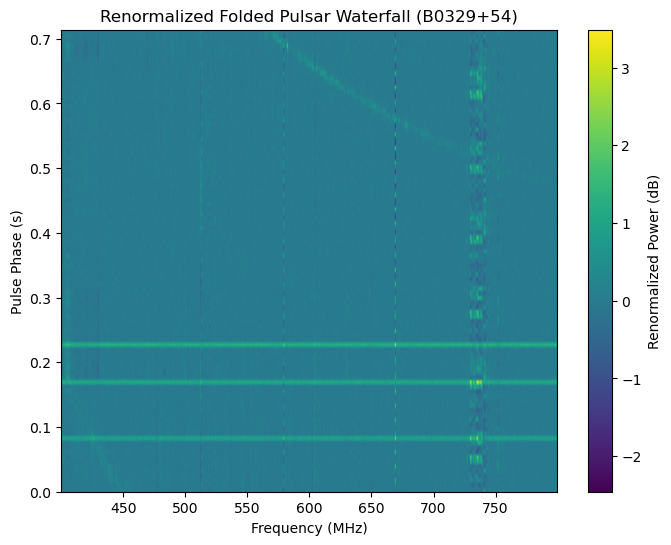

In [16]:
if __name__ == "__main__":
    filename = "AST326_ARO_B0329+54.v01.dat"  # Replace with your file path
    time_sec, freqs, waterfall = read_pulsar_data(filename)

    # Pulsar properties
    pulse_period = 0.714  # Pulsar period in seconds (replace with actual value)

    # Fold the data
    phase_bins, folded_signal = fold_pulsar_data(time_sec, freqs, waterfall, pulse_period)

    # ------------------------------------
    # Renormalize the folded waterfall plot
    # ------------------------------------
    # Compute the median across pulse phase (axis=0 => per frequency channel)
    median_vals = np.median(folded_signal, axis=0)

    # Avoid division by zero
    median_vals[median_vals == 0] = 1e-10

    # Normalize each frequency channel
    folded_signal_norm = folded_signal / median_vals

    # Convert normalized intensities to dB
    folded_signal_dB = 10 * np.log10(folded_signal_norm + 1e-10)

    # Plot the renormalized folded waterfall
    plt.figure(figsize=(8, 6))
    plt.imshow(
        folded_signal_dB,
        aspect='auto',
        origin='lower',
        extent=[freqs.min(), freqs.max(), 0, pulse_period],
        cmap='viridis'
    )
    plt.colorbar(label='Renormalized Power (dB)')
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Pulse Phase (s)")
    plt.title("Renormalized Folded Pulsar Waterfall (B0329+54)")
    plt.show()

In [17]:
import numpy as np

# Constants
boltzmann_constant = 1.38e-23  # J/K
telescope_diameter = 46  # Diameter of the telescope in meters
geometric_area = np.pi * (telescope_diameter / 2) ** 2  # Geometric area in m^2
aperture_efficiency = 0.3  # Assumed aperture efficiency (30%)
A_eff = aperture_efficiency * geometric_area  # Effective aperture in m^2
sky_temperature = 10  # Sky temperature in Kelvin
receiver_noise_temperature = 50  # Receiver noise temperature in Kelvin (example value)
T_sys = sky_temperature + receiver_noise_temperature  # System temperature
bandwidth = 1e6  # Bandwidth in Hz (replace with actual sub-band bandwidth)

# Measured power (in ADC units) from folded signal
pulse_power_adc = np.max(folded_signal)  # Peak power of typical pulse (arbitrary units)

# Convert power to flux density
flux_density = pulse_power_adc / (A_eff * boltzmann_constant * T_sys * bandwidth)

# Convert to Jy (1 Jy = 1e-26 W/m^2/Hz)
flux_density_jy = flux_density * 1e26

print(f"Typical flux density of B0329+54 pulses in this band: {flux_density_jy:.2e} Jy")


Typical flux density of B0329+54 pulses in this band: 1.74e+40 Jy


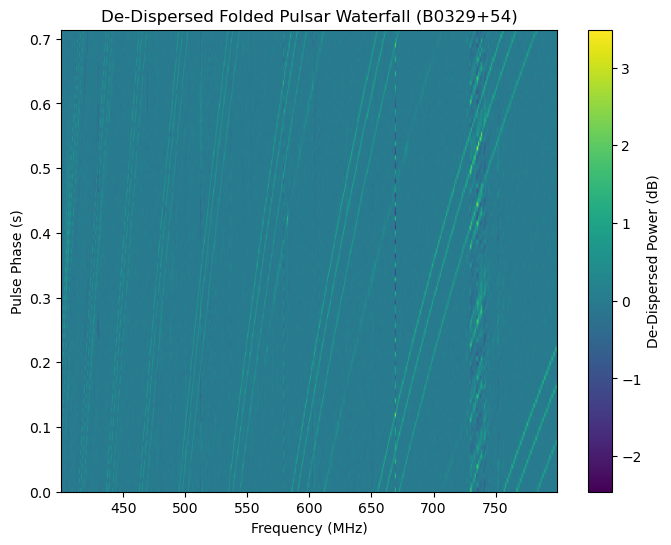

In [20]:
def dedisperse_data(waterfall, freqs, time_sec, DM):
    """
    De-disperses the waterfall data using the Dispersion Measure
    """
    freqs_ghz = freqs/1000.0  # Convert frequencies to GHz
    delay_ms = 4.15 * DM * (1 / freqs_ghz**2 - 1 / max(freqs_ghz)**2)
    delay_sec = delay_ms / 1000.0  # Convert to seconds
    waterfall_dedispersed = np.zeros_like(waterfall)
    for i, delay in enumerate(delay_sec):
        shift_idx = int(np.round(delay / (time_sec[1] - time_sec[0])))
        waterfall_dedispersed[:, i] = np.roll(waterfall[:, i], -shift_idx)
    return waterfall_dedispersed

if __name__ == "__main__":
    filename = "AST326_ARO_B0329+54.v01.dat"  # Replace with your file path
    time_sec, freqs, waterfall = read_pulsar_data(filename)

    if time_sec is not None:
        # Pulsar properties
        pulse_period = 0.714  # Pulsar period in seconds
        DM = 26.8  # Dispersion Measure in pc/cm^3

        # 1. Fold the data
        phase_bins, folded_signal = fold_pulsar_data(time_sec, freqs, waterfall, pulse_period)

        # 2. Renormalize the folded data
        median_vals = np.median(folded_signal, axis=0)
        median_vals[median_vals == 0] = 1e-10  # Prevent division by zero
        folded_signal_norm = folded_signal / median_vals

        # 3. De-disperse the normalized folded data
        folded_signal_dedispersed = dedisperse_data(folded_signal_norm, freqs, time_sec, DM)

        # Convert to dB for visualization
        folded_signal_dedispersed_dB = 10 * np.log10(folded_signal_dedispersed + 1e-10)

        # Plot the de-dispersed folded waterfall
        plt.figure(figsize=(8, 6))
        plt.imshow(
            folded_signal_dedispersed_dB,
            aspect='auto',
            origin='lower',
            extent=[freqs.min(), freqs.max(), 0, pulse_period],
            cmap='viridis'
        )
        plt.colorbar(label='De-Dispersed Power (dB)')
        plt.xlabel("Frequency (MHz)")
        plt.ylabel("Pulse Phase (s)")
        plt.title("De-Dispersed Folded Pulsar Waterfall (B0329+54)")
        plt.show()

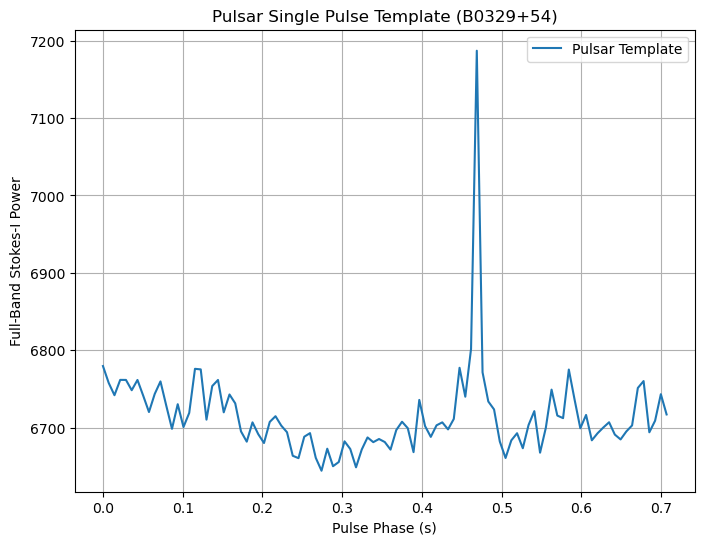

In [21]:
if __name__ == "__main__":
    filename = "AST326_ARO_B0329+54.v01.dat"  # Replace with your file path
    time_sec, freqs, waterfall = read_pulsar_data(filename)

    if time_sec is not None:
        # Pulsar properties
        pulse_period = 0.714  # Pulsar period in seconds
        DM = 26.8  # Dispersion Measure in pc/cm^3

        # 1. De-disperse the data
        waterfall_dedispersed = dedisperse_data(waterfall, freqs, time_sec, DM)

        # 2. Sum across frequency band to get full-band Stokes-I
        full_band_power = np.sum(waterfall_dedispersed, axis=1)

        # 3. Fold the full-band power over the pulsar period
        phase_bins, folded_power = fold_pulsar_data(
            time_sec, np.array([0]), full_band_power[:, np.newaxis], pulse_period
        )

        # 4. Compute the average template
        pulse_template = np.mean(folded_power, axis=1)

        # 5. Plot the single pulse template
        plt.figure(figsize=(8, 6))
        plt.plot(phase_bins, pulse_template, label="Pulsar Template")
        plt.xlabel("Pulse Phase (s)")
        plt.ylabel("Full-Band Stokes-I Power")
        plt.title("Pulsar Single Pulse Template (B0329+54)")
        plt.legend()
        plt.grid(True)
        plt.show()

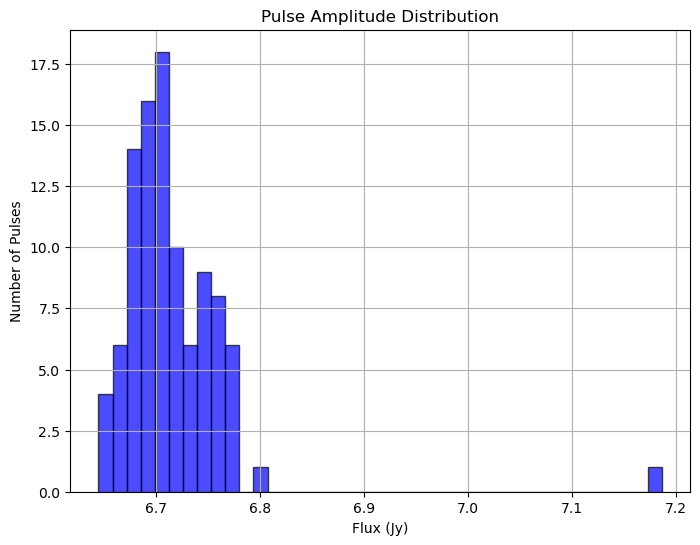

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def dedisperse_data(waterfall, freqs, time_sec, DM):
    """
    De-disperses the input waterfall data using the provided DM (Dispersion Measure).
    """
    freqs_ghz = freqs / 1000.0  # Convert frequencies to GHz
    delay_ms = 4.15 * DM * (1 / freqs_ghz**2 - 1 / max(freqs_ghz)**2)
    delay_sec = delay_ms / 1000.0  # Convert to seconds
    waterfall_dedispersed = np.zeros_like(waterfall)
    for i, delay in enumerate(delay_sec):
        shift_idx = int(np.round(delay / (time_sec[1] - time_sec[0])))
        waterfall_dedispersed[:, i] = np.roll(waterfall[:, i], -shift_idx)
    return waterfall_dedispersed

if __name__ == "__main__":
    # Replace with your file path
    filename = "AST326_ARO_B0329+54.v01.dat"

    # Read the data
    time_sec, freqs, waterfall = read_pulsar_data(filename)

    if time_sec is not None:
        # Pulsar properties
        pulse_period = 0.714  # Pulsar period in seconds
        DM = 26.8  # Dispersion Measure in pc/cm^3
        calibration_factor = 1e-3  # Example calibration factor to convert to Jy (replace with your value)

        # 1. De-disperse the data
        waterfall_dedispersed = dedisperse_data(waterfall, freqs, time_sec, DM)

        # 2. Sum across frequency to get full-band Stokes-I power
        full_band_power = np.sum(waterfall_dedispersed, axis=1)

        # 3. Fold the time series into pulse phase
        phase_bins = np.linspace(0, pulse_period, 100)  # 100 phase bins
        phases = (time_sec % pulse_period) / pulse_period
        pulse_amplitudes = []

        for i in range(len(phase_bins) - 1):
            phase_mask = (phases >= phase_bins[i]) & (phases < phase_bins[i + 1])
            if np.any(phase_mask):
                pulse_amplitudes.append(np.mean(full_band_power[phase_mask]))

        # 4. Convert power to flux (Jy)
        pulse_amplitudes = np.array(pulse_amplitudes) * calibration_factor

        # 5. Plot a histogram of pulse fluxes
        plt.figure(figsize=(8, 6))
        plt.hist(pulse_amplitudes, bins=40, color='blue', edgecolor='black', alpha=0.7)
        plt.xlabel("Flux (Jy)")
        plt.ylabel("Number of Pulses")
        plt.title("Pulse Amplitude Distribution")
        plt.grid(True)
        plt.show()


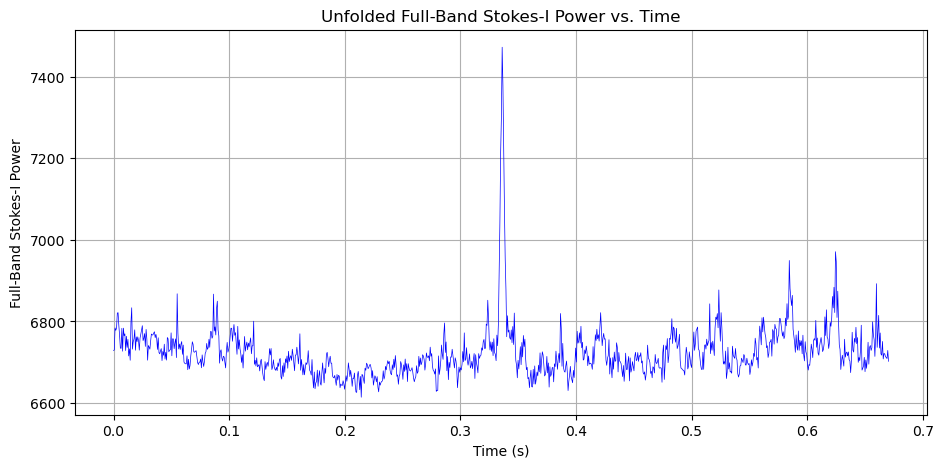

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def dedisperse_data(waterfall, freqs, time_sec, DM):
    """
    De-disperses the input waterfall data using the provided DM (Dispersion Measure).
    """
    freqs_ghz = freqs / 1000.0  # Convert frequencies to GHz
    delay_ms = 4.15 * DM * (1 / freqs_ghz**2 - 1 / max(freqs_ghz)**2)
    delay_sec = delay_ms / 1000.0  # Convert to seconds
    waterfall_dedispersed = np.zeros_like(waterfall)
    for i, delay in enumerate(delay_sec):
        shift_idx = int(np.round(delay / (time_sec[1] - time_sec[0])))
        waterfall_dedispersed[:, i] = np.roll(waterfall[:, i], -shift_idx)
    return waterfall_dedispersed

if __name__ == "__main__":
    filename = "AST326_ARO_B0329+54.v01.dat"  # Replace with your file path
    time_sec, freqs, waterfall = read_pulsar_data(filename)

    if time_sec is not None:
        # Pulsar properties
        DM = 26.8  # Dispersion Measure in pc/cm^3

        # 1. De-disperse the raw data
        waterfall_dedispersed = dedisperse_data(waterfall, freqs, time_sec, DM)

        # 2. Sum across frequency to get full-band Stokes-I power
        full_band_power = np.sum(waterfall_dedispersed, axis=1)

        # 3. Plot the full-band Stokes-I power vs. time
        plt.figure(figsize=(11, 5))
        plt.plot(time_sec, full_band_power, color="blue", linewidth=0.5)
        plt.xlabel("Time (s)")
        plt.ylabel("Full-Band Stokes-I Power")
        plt.title("Unfolded Full-Band Stokes-I Power vs. Time")
        plt.grid(True)
        plt.show()


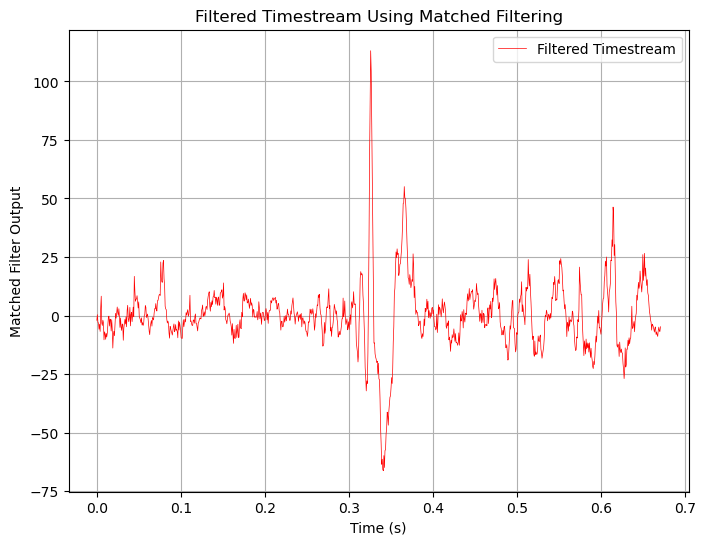

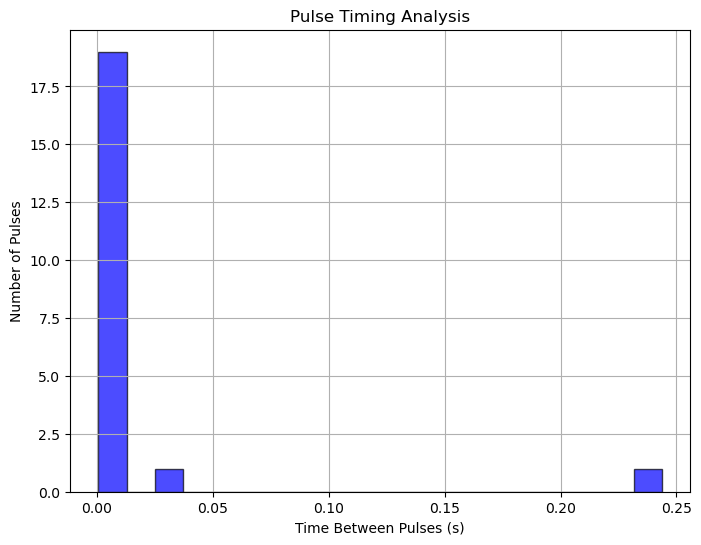

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

def convolve(timestream, template):
    """
    Convolve the timestream with the normalized template for matched filtering.
    """
    # normalize template
    template = (template-np.mean(template)) / np.std(template)

    # using the FFT-based convolution for efficiency
    filter_time = fftconvolve(timestream, template[::-1], mode='same')
    return filter_time

if __name__ == "__main__":
    filename = "AST326_ARO_B0329+54.v01.dat"
    time_sec, freqs, waterfall = read_pulsar_data(filename)

    if time_sec is not None:
        # have pulsar properties
        pulse_period = 0.714  # in seconds
        DM = 26.8  
        # de-disperse the data
        waterf_dedisp = dedisperse_data(waterfall, freqs, time_sec, DM)
        # sum across frequency to get full-band Stokes-I power
        full_band_power = np.sum(waterf_dedisp, axis=1)
        # normalize timestream
        full_band_power = (full_band_power-np.mean(full_band_power)) / np.std(full_band_power)
        # fold the data to get the template
        phase_bins, folded_power = fold_pulsar_data(time_sec, np.array([0]), full_band_power[:, np.newaxis], pulse_period)
        template = np.mean(folded_power, axis=1)
        # convolve timestream with template
        filter_time = convolve(full_band_power, template)
        # plotting
        plt.figure(figsize=(8, 6))
        plt.plot(time_sec, filter_time, color="red", linewidth=0.5, label="Filtered Timestream")
        plt.xlabel("Time (s)")
        plt.ylabel("Matched Filter Output")
        plt.title("Filtered Timestream Using Matched Filtering")
        plt.legend()
        plt.grid()
        plt.show()
        # analyse pulse timing
        threshold = np.mean(filter_time) + 2 * np.std(filter_time)  
        pulse_indices = np.where(filter_time > threshold)[0]
        pulse_times = time_sec[pulse_indices]
        # check if pulses align with the known period
        pulse_differences = np.diff(pulse_times)
        plt.figure(figsize=(8, 6))
        plt.hist(pulse_differences, bins=20, color="blue", edgecolor="black", alpha=0.7)
        plt.xlabel("Time Between Pulses (s)")
        plt.ylabel("Number of Pulses")
        plt.title("Pulse Timing Analysis")
        plt.grid()
        plt.show()
